<h1>Deep-dentistry model for decay analysis</h1>

In [1]:
#Setting up resources and libraries required

import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Flatten, Dense
from keras.layers.convolutional import *
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#Local and relative paths to the files are used..
train_path = 'Data/train'
valid_path = 'Data/validate'
test_path = 'Data/test'

In [3]:
train_bconvert = ImageDataGenerator().flow_from_directory(train_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=20)
valid_bconvert = ImageDataGenerator().flow_from_directory(valid_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=10)
test_bconvert = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=20)

Found 1234 images belonging to 2 classes.
Found 307 images belonging to 2 classes.
Found 386 images belonging to 2 classes.


In [6]:
# Function plots images with labels
def plots(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_bconvert)

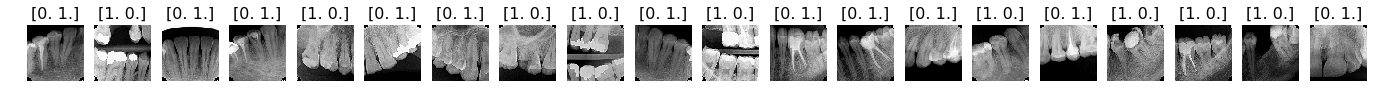

In [7]:
plots(imgs, titles=labels)

<h2>Network Architecture</h2>

In [4]:
input1 = keras.layers.Input(shape=(64, 64, 3))
C1 = Conv2D(32, (3, 3), strides=(2, 2), activation='linear', input_shape=(64,64,3),
                kernel_regularizer=regularizers.l2(9.999999747378752e-05), padding='valid')(input1)
BN1 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C1)
A1 = Activation('relu')(BN1)
C2=Conv2D(64, (3, 3), strides=(1, 1), activation='linear', input_shape=(64,64,3),
                kernel_regularizer=regularizers.l2(9.999999747378752e-05), padding='same')(A1)
BN2 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C2)
A2 = Activation('relu')(BN2)
C_sep_1 = SeparableConv2D(64, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A2)
BN3 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_1)
add_1 = keras.layers.add([A2,BN3])
A3 = Activation('relu')(add_1)
F1 = Flatten()(A3)
out = keras.layers.Dense(units=2, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                        kernel_regularizer=None)(F1)
model = keras.models.Model(inputs=[input1], outputs=out)

C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsilon=0.001, momentum=0.99, weights=None)`
  after removing the cwd from sys.path.
C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsilon=0.001, momentum=0.99, weights=None)`
  
C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsilon=0.001, momentum=0.99, weights=None)`
  


In [5]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 31, 31, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 31, 31, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 31, 31, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [10]:
for layer in model.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print (g)
    print (h)

{'batch_input_shape': (None, 64, 64, 3), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'}
[]
{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 64, 64, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 9.999999747378752e-05}}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[[[-0.00775903, -0.11383927, -0.00185689, -0.04955542,
           0.0794785 , -0.0032385 ,  0.05446094, -0.07919137,
           0.12559049, -0.02376845, -0.05034366,  0.05470115,
           0.06761481, -0.029

{'name': 'batch_normalization_1', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([1., 1., 

In [7]:
hist = model.fit_generator(train_bconvert, steps_per_epoch=55, 
                    validation_data=valid_bconvert, validation_steps=25, epochs=5, verbose=2) 

Epoch 1/5
 - 184s - loss: 0.7706 - acc: 0.6493 - val_loss: 0.7438 - val_acc: 0.6200
Epoch 2/5
 - 89s - loss: 0.4716 - acc: 0.8129 - val_loss: 0.7330 - val_acc: 0.6235
Epoch 3/5
 - 96s - loss: 0.3545 - acc: 0.8532 - val_loss: 0.7567 - val_acc: 0.6113
Epoch 4/5
 - 78s - loss: 0.2335 - acc: 0.9369 - val_loss: 0.7248 - val_acc: 0.6275
Epoch 5/5
 - 71s - loss: 0.1634 - acc: 0.9718 - val_loss: 0.7241 - val_acc: 0.6802


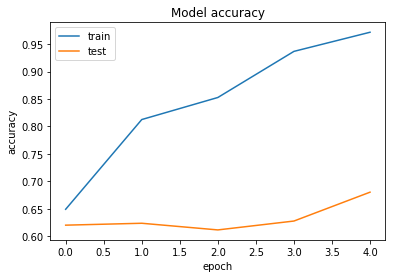

In [14]:
#Accuracy Plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

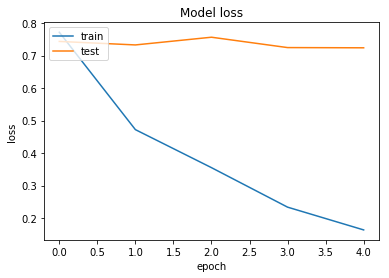

In [13]:
#loss Plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Results</h2>

In [12]:
test_bconf = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=100)
test_imgs, test_labels = next(test_bconf)

Found 386 images belonging to 2 classes.


In [15]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.],
      dtype=float32)

In [16]:
predictions = model.predict_generator(test_bconf, steps=1, verbose=0)


In [17]:
predictions

array([[0.40794548, 0.59205455],
       [0.9068503 , 0.09314972],
       [0.07115698, 0.928843  ],
       [0.71692324, 0.28307673],
       [0.9366309 , 0.06336912],
       [0.78142875, 0.21857126],
       [0.41319525, 0.5868047 ],
       [0.2176137 , 0.7823863 ],
       [0.213523  , 0.786477  ],
       [0.35404396, 0.64595604],
       [0.98431975, 0.01568022],
       [0.5215736 , 0.47842637],
       [0.06787199, 0.932128  ],
       [0.1918733 , 0.8081267 ],
       [0.99683005, 0.00316999],
       [0.665832  , 0.334168  ],
       [0.46539566, 0.5346043 ],
       [0.9927551 , 0.00724484],
       [0.50023663, 0.49976337],
       [0.3914725 , 0.60852754],
       [0.1285944 , 0.8714056 ],
       [0.9530944 , 0.04690554],
       [0.855553  , 0.14444704],
       [0.79630953, 0.2036905 ],
       [0.06351522, 0.93648475],
       [0.2307305 , 0.76926947],
       [0.958223  , 0.04177697],
       [0.8074016 , 0.19259839],
       [0.8008902 , 0.19910978],
       [0.3496164 , 0.6503836 ],
       [0.

In [18]:
predictions=np.round(predictions,0)

In [19]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24 26]
 [26 24]]


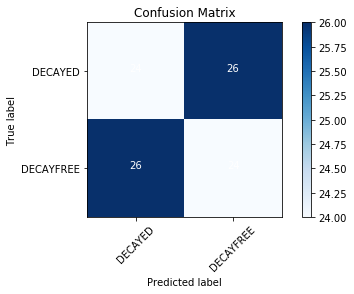

In [21]:
cm_plot_labels = ['DECAYED','DECAYFREE']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')